# Load Data

### Goals

- explore both datasets
- load both csvs into pandas dataframes
- extract the correct zone spot price day ahead that corresponds to Aarhus
- make plots of the weather, as line graphs
- make plots of the day ahead spot price as one line graph

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [6]:
spotPricesdf = pd.read_csv('./data/Elspotprices.csv',delimiter=';',decimal=',')
spotPricesdf.head()

,HourUTC,HourDK,PriceArea,SpotPriceDKK,SpotPriceEUR
0,2024-12-31 22:00:00,2024-12-31 23:00:00,SYSTEM,35.430000,4.75
1,2024-12-31 22:00:00,2024-12-31 23:00:00,NO2,118.239998,15.85
2,2024-12-31 22:00:00,2024-12-31 23:00:00,SE3,16.709999,2.24
3,2024-12-31 22:00:00,2024-12-31 23:00:00,SE4,12.980000,1.74
4,2024-12-31 22:00:00,2024-12-31 23:00:00,DK1,3.880000,0.52


In [13]:
spotPricesdf['HourDK'] = pd.to_datetime(spotPricesdf['HourDK'],format='%Y-%m-%d %H:%M:%S')
spotPricesdf['HourUTC'] = pd.to_datetime(spotPricesdf['HourUTC'],format='%Y-%m-%d %H:%M:%S')

In [9]:
spotPricesdf['HourDK']

0       2024-12-31 23:00:00
1       2024-12-31 23:00:00
2       2024-12-31 23:00:00
3       2024-12-31 23:00:00
4       2024-12-31 23:00:00
                ...        
61483   2024-01-01 00:00:00
61484   2024-01-01 00:00:00
61485   2024-01-01 00:00:00
61486   2024-01-01 00:00:00
61487   2024-01-01 00:00:00
Name: HourDK, Length: 61488, dtype: datetime64[ns]

In [14]:
DK1spotPricesdf = spotPricesdf[spotPricesdf['PriceArea']=='DK1']
DK1spotPricesdf.drop('PriceArea', axis=1).head()

,HourUTC,HourDK,SpotPriceDKK,SpotPriceEUR
4,2024-12-31 22:00:00,2024-12-31 23:00:00,3.880000,0.52
9,2024-12-31 21:00:00,2024-12-31 22:00:00,67.580002,9.06
18,2024-12-31 20:00:00,2024-12-31 21:00:00,117.120003,15.70
23,2024-12-31 19:00:00,2024-12-31 20:00:00,141.729996,19.00
32,2024-12-31 18:00:00,2024-12-31 19:00:00,186.639999,25.02


#### Top rows is latest time

In [25]:
DK1spotPricesdf.describe()

,HourUTC,HourDK,SpotPriceDKK,SpotPriceEUR
count,8784,8784,8784.000000,8784.000000
mean,2024-07-01 22:30:00,2024-07-02 00:04:25.573770240,526.928003,70.644448
min,2023-12-31 23:00:00,2024-01-01 00:00:00,-448.019989,-60.049999
25%,2024-04-01 10:45:00,2024-04-01 12:45:00,302.142509,40.497501
50%,2024-07-01 22:30:00,2024-07-02 00:30:00,506.354995,67.900002
75%,2024-10-01 10:15:00,2024-10-01 12:15:00,709.677475,95.152502
max,2024-12-31 22:00:00,2024-12-31 23:00:00,6982.419922,936.280029
std,NaN,NaN,374.109275,50.155507


In [26]:
DK1spotPricesdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 4 to 61485
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HourUTC       8784 non-null   datetime64[ns]
 1   HourDK        8784 non-null   datetime64[ns]
 2   PriceArea     8784 non-null   object        
 3   SpotPriceDKK  8784 non-null   float64       
 4   SpotPriceEUR  8784 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 411.8+ KB


Text(0.5, 1.0, 'Day Ahead Spot Price DK1')

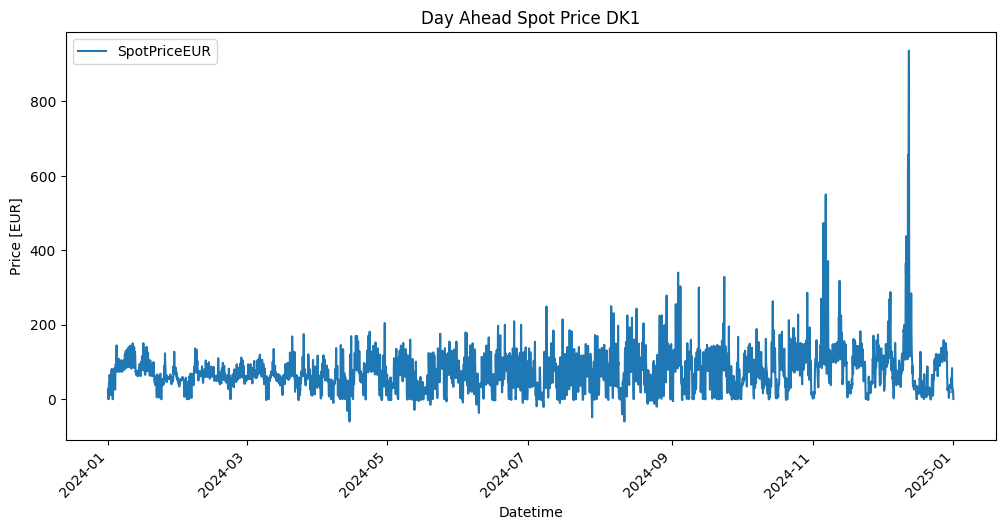

In [18]:
ax=DK1spotPricesdf.plot(x='HourDK',y='SpotPriceEUR',
                        rot=45,
                        figsize=(12,6))
ax.set_ylabel('Price [EUR]')
ax.set_xlabel('Datetime')
ax.set_title('Day Ahead Spot Price DK1')

In [20]:
openmeteodf=pd.read_csv('./data/open-meteo-56.13N10.19E27m.csv',skiprows=3)
openmeteodf['time'] = pd.to_datetime(openmeteodf['time'],format='%Y-%m-%dT%H:%M')
openmeteodf.head()

,time,temperature_2m (°C),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),sunshine_duration (s),albedo (undefined)
0,2024-01-01 00:00:00,5.8,0.3,100,3,100,100,13.0,23.2,0.0,NaN
1,2024-01-01 01:00:00,5.5,0.1,100,37,93,99,15.1,26.8,0.0,NaN
2,2024-01-01 02:00:00,5.4,0.1,100,48,100,90,13.7,25.3,0.0,NaN
3,2024-01-01 03:00:00,5.2,0.1,100,31,84,100,16.4,28.2,0.0,NaN
4,2024-01-01 04:00:00,5.0,0.0,40,37,5,2,17.6,30.1,0.0,NaN


In [28]:
openmeteodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8808 non-null   datetime64[ns]
 1   temperature_2m (°C)     8808 non-null   float64       
 2   rain (mm)               8808 non-null   float64       
 3   cloud_cover (%)         8808 non-null   int64         
 4   cloud_cover_low (%)     8808 non-null   int64         
 5   cloud_cover_mid (%)     8808 non-null   int64         
 6   cloud_cover_high (%)    8808 non-null   int64         
 7   wind_speed_10m (km/h)   8808 non-null   float64       
 8   wind_speed_100m (km/h)  8808 non-null   float64       
 9   sunshine_duration (s)   8808 non-null   float64       
 10  albedo (undefined)      0 non-null      float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 757.1 KB


In [23]:
openmeteodf.columns.tolist()

['time',
 'temperature_2m (°C)',
 'rain (mm)',
 'cloud_cover (%)',
 'cloud_cover_low (%)',
 'cloud_cover_mid (%)',
 'cloud_cover_high (%)',
 'wind_speed_10m (km/h)',
 'wind_speed_100m (km/h)',
 'sunshine_duration (s)',
 'albedo (undefined)']

In [27]:
openmeteodf.describe()

,time,temperature_2m (°C),rain (mm),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),sunshine_duration (s),albedo (undefined)
count,8808,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,0.0
mean,2024-07-02 11:30:00,9.668006,0.103747,70.153724,42.629087,31.928134,44.253065,16.806392,27.063953,1052.668300,NaN
min,2024-01-01 00:00:00,-10.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,NaN
25%,2024-04-01 17:45:00,4.900000,0.000000,33.000000,1.000000,0.000000,0.000000,10.800000,18.475000,0.000000,NaN
50%,2024-07-02 11:30:00,9.600000,0.000000,98.500000,22.000000,6.000000,23.000000,15.900000,26.400000,0.000000,NaN
75%,2024-10-02 05:15:00,14.400000,0.000000,100.000000,100.000000,73.000000,99.000000,21.600000,34.200000,3600.000000,NaN
max,2025-01-01 23:00:00,26.300000,9.000000,100.000000,100.000000,100.000000,100.000000,55.300000,82.500000,3600.000000,NaN
std,NaN,6.196574,0.419294,38.709112,42.949358,40.413972,45.122277,7.907879,11.735565,1586.680483,NaN


#### Bottom rows is latest time (inverse of the spotprices csv)

Text(0.5, 1.0, '56.13N 10.19E (Aarhus) Open Meteo')

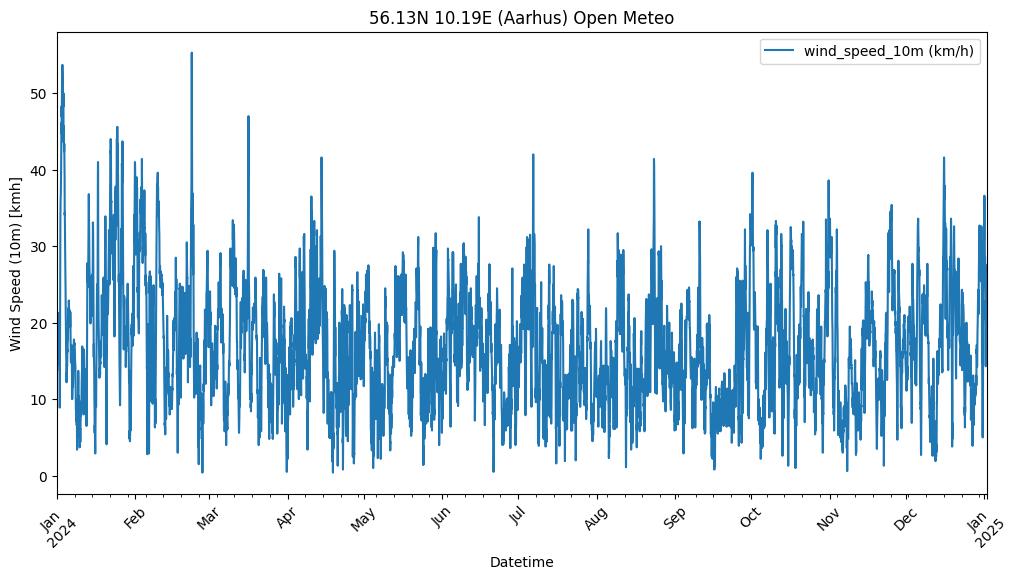

In [24]:
ax1=openmeteodf.plot(x='time',y='wind_speed_10m (km/h)',
                        rot=45,
                        figsize=(12,6))
ax1.set_ylabel('Wind Speed (10m) [kmh]')
ax1.set_xlabel('Datetime')
ax1.set_title('56.13N 10.19E (Aarhus) Open Meteo')